In [1]:
import sys
import pprint
from pathlib import Path
project_root = str(Path.cwd().parent)
if project_root not in sys.path:
 sys.path.append(project_root)
 
from pipeline.utils.general import load_json_data
from pipeline.utils.path_manager import PathManager
from evaluation.analysis.activity_analysis.pig_activity_visualization import PigBehaviorVisualizer
from evaluation.analysis.activity_analysis.pig_activity_analyzer import PigBehaviorAnalyzer

path_manager = PathManager()

## Load config

In [2]:
config_activity_evaluation = load_json_data('configs/config_activity.json')

pprint.pprint(config_activity_evaluation, compact=True)

{'abs_change_outlier_iqr_factor': 3,
 'analysis_window_days': [1, 3, 5, 7],
 'comparison_metrics': ['value_at_removal', '1d_window_avg', '3d_window_avg',
                        '5d_window_avg', '7d_window_avg', '1d_window_slope',
                        '3d_window_slope', '5d_window_slope', '7d_window_slope',
                        'abs_change_1d', 'abs_change_3d', 'abs_change_5d',
                        'abs_change_7d'],
 'comparison_stats_activity_filename': 'outbreak_vs_control_comparison_activity.csv',
 'comparison_stats_num_pigs_lying_filename': 'outbreak_vs_control_comparison_num_pigs_lying.csv',
 'comparison_stats_num_pigs_notLying_filename': 'outbreak_vs_control_comparison_num_pigs_notLying.csv',
 'confidence_level': 0.95,
 'control_date_margin': 5,
 'control_samples_per_pen': 5,
 'control_stats_activity_filename': 'control_statistics_activity.csv',
 'control_stats_num_pigs_lying_filename': 'control_statistics_num_pigs_lying.csv',
 'control_stats_num_pigs_notLying_filename':

## Run analysis

In [3]:
# Initialize the analyzer
analyzer = PigBehaviorAnalyzer(config_activity_evaluation)

# Load monitoring data
analyzer.load_data()  # This loads data from default locations in path_manager

# Process and analyze the data
results = analyzer.run_complete_behavior_analysis()


2025-07-09 08:46:54,818 - INFO - Loading monitoring pipeline data...
2025-07-09 08:47:01,273 - WARNING - Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
2025-07-09 08:47:03,302 - WARNING - Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
2025-07-09 08:47:03,313 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_11_08_18_23-09_18_23.csv. Skipping.
2025-07-09 08:47:03,324 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_13_08_18_21-09_18_21.csv. Skipping

## Analysis and visualizations

In [3]:
# Initialize the visualizer
visualizer = PigBehaviorVisualizer(config_activity_evaluation)

# # Load and process data
visualizer.load_data()  
visualizer.preprocess_monitoring_results()

# Run analysis (required before visualization)
visualizer.analyze_pre_outbreak_statistics()
visualizer.analyze_control_pen_statistics()
visualizer.compare_outbreak_vs_control_statistics()

# create visualizations
visualization_files = visualizer.visualize_behavior_metrics()

2025-07-09 10:21:32,759 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:21:32,761 - INFO - Plotting style set for behavior visualization.
2025-07-09 10:21:32,761 - INFO - Loading monitoring pipeline data...
2025-07-09 10:21:39,266 - WARNING - Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
2025-07-09 10:21:41,314 - WARNING - Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
2025-07-09 10:21:41,325 - WARNING - Dataframe became empty after time filtering: Kam

## Visualization

2025-07-09 10:23:32,392 - INFO - Visualizing behavior metrics analysis...
2025-07-09 10:23:32,393 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:23:32,394 - INFO - Creating visualization for num_pigs_lying
2025-07-09 10:23:34,150 - INFO - Saved num_pigs_lying visualization to results/results_activity_evaluation/behavior_analysis_num_pigs_lying.png


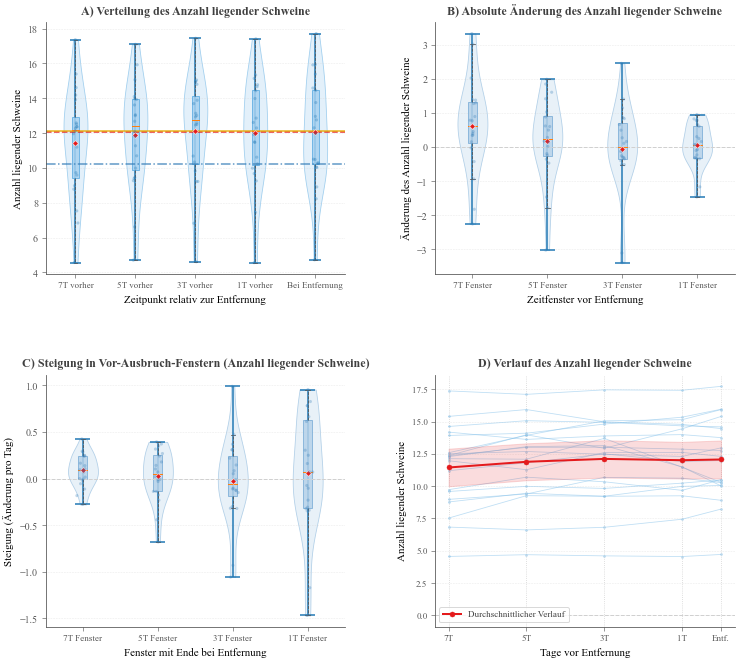

2025-07-09 10:23:34,448 - INFO - Creating visualization for num_pigs_notLying
2025-07-09 10:23:36,203 - INFO - Saved num_pigs_notLying visualization to results/results_activity_evaluation/behavior_analysis_num_pigs_notLying.png


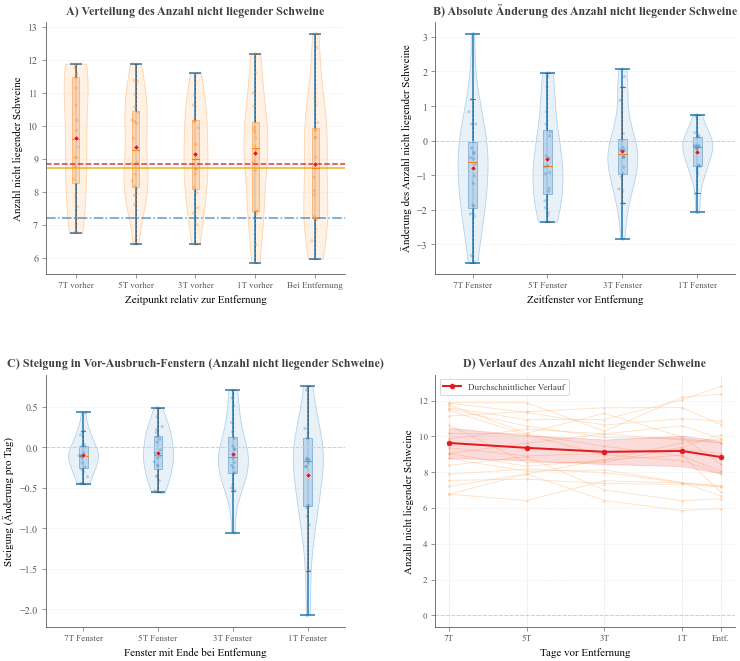

2025-07-09 10:23:36,500 - INFO - Creating visualization for activity
2025-07-09 10:23:38,168 - INFO - Saved activity visualization to results/results_activity_evaluation/behavior_analysis_activity.png


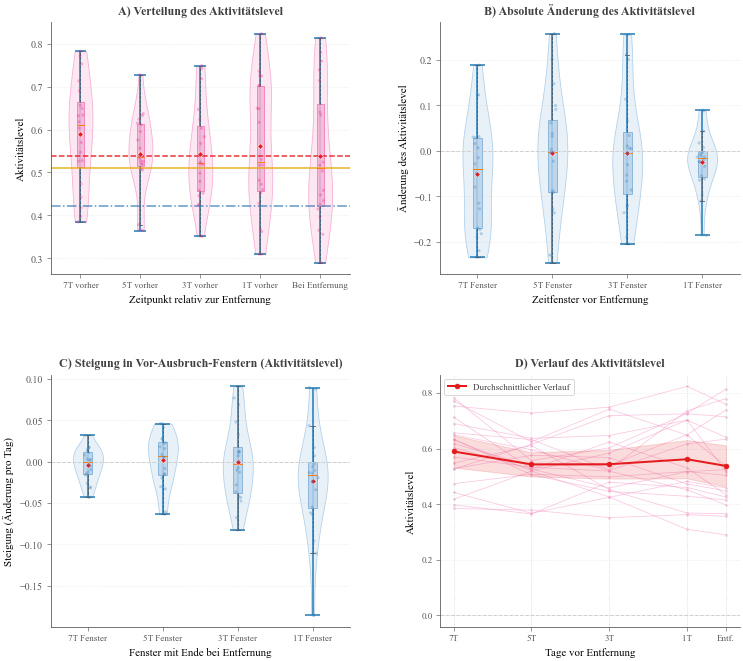

{'num_pigs_lying': 'results/results_activity_evaluation/behavior_analysis_num_pigs_lying.png',
 'num_pigs_notLying': 'results/results_activity_evaluation/behavior_analysis_num_pigs_notLying.png',
 'activity': 'results/results_activity_evaluation/behavior_analysis_activity.png'}

In [5]:
visualizer.visualize_behavior_metrics(show=True)

2025-07-09 10:24:05,992 - INFO - Visualizing behavior metrics comparison...
2025-07-09 10:24:05,993 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:24:05,994 - INFO - Creating comparison visualization for num_pigs_lying
2025-07-09 10:24:08,095 - INFO - Saved num_pigs_lying comparison visualization to results/results_activity_evaluation/behavior_comparison_num_pigs_lying.png


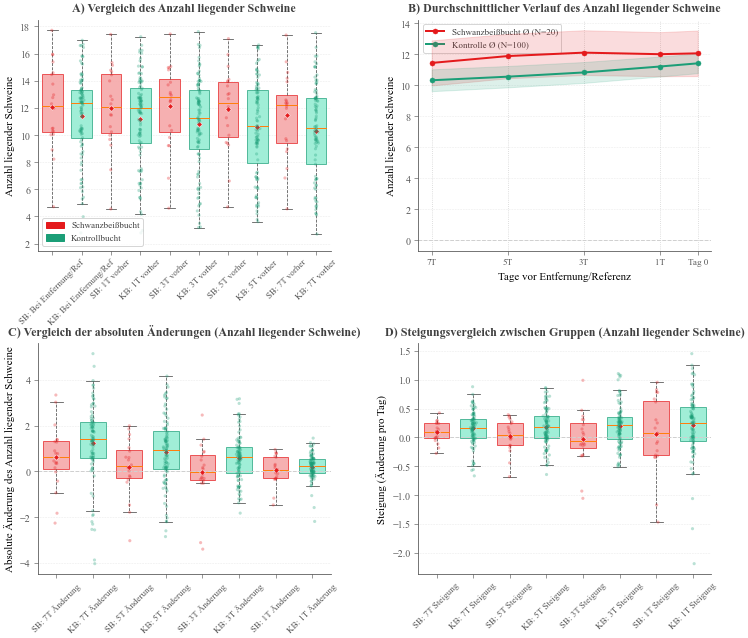

2025-07-09 10:24:08,530 - INFO - Creating comparison visualization for num_pigs_notLying
2025-07-09 10:24:10,570 - INFO - Saved num_pigs_notLying comparison visualization to results/results_activity_evaluation/behavior_comparison_num_pigs_notLying.png


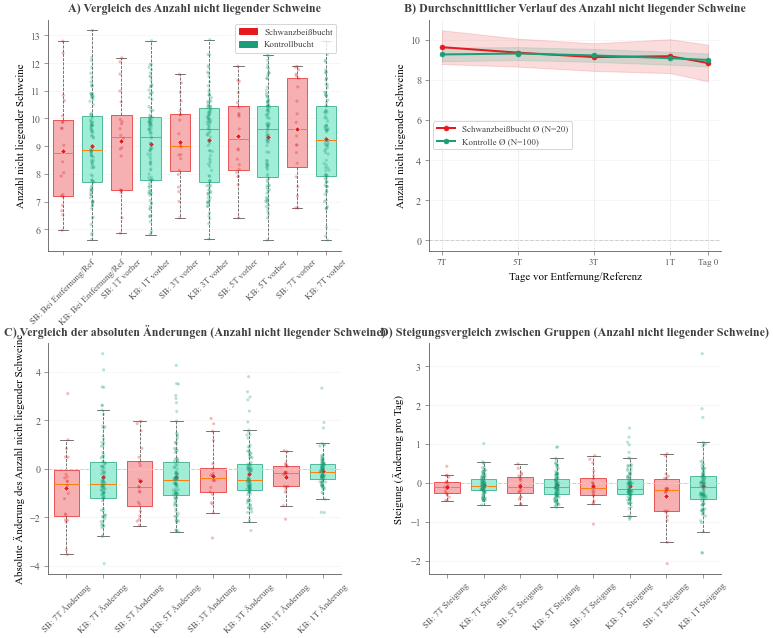

2025-07-09 10:24:10,999 - INFO - Creating comparison visualization for activity
2025-07-09 10:24:12,918 - INFO - Saved activity comparison visualization to results/results_activity_evaluation/behavior_comparison_activity.png


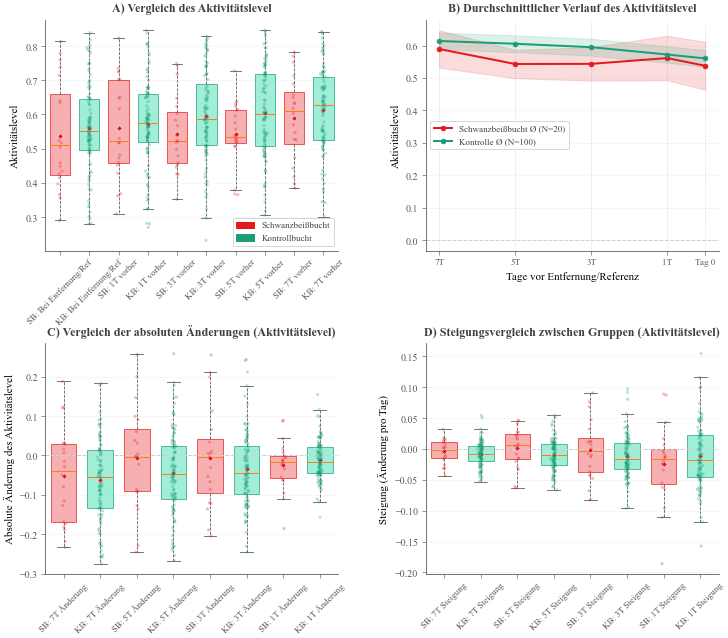

{'num_pigs_lying': 'results/results_activity_evaluation/behavior_comparison_num_pigs_lying.png',
 'num_pigs_notLying': 'results/results_activity_evaluation/behavior_comparison_num_pigs_notLying.png',
 'activity': 'results/results_activity_evaluation/behavior_comparison_activity.png'}

In [6]:
visualizer.visualize_behavior_comparison(show=True)

2025-07-09 10:24:15,153 - INFO - Visualizing lying components (lying vs not lying pigs)...
2025-07-09 10:24:15,154 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:24:16,688 - INFO - Saved lying component visualization to results/results_activity_evaluation/lying_component_analysis.png


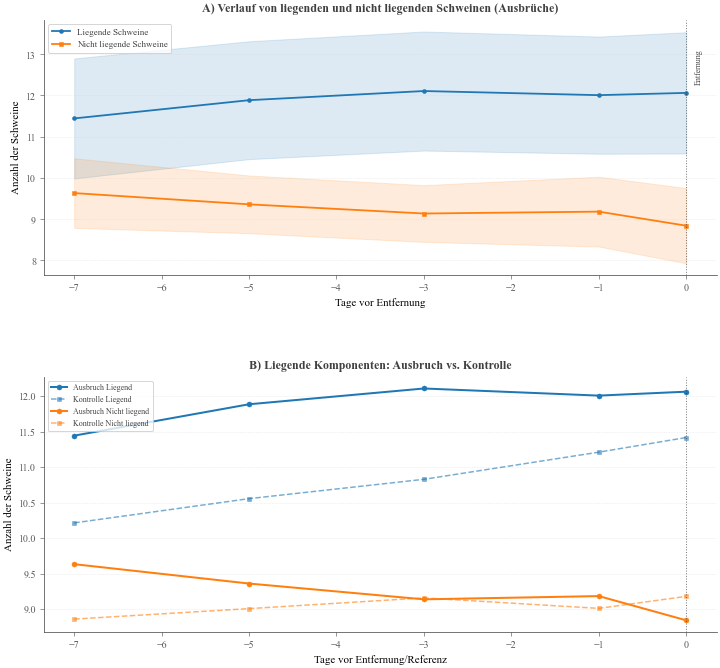

'results/results_activity_evaluation/lying_component_analysis.png'

In [7]:
visualizer.visualize_activity_components(show=True)